In [11]:
import numpy as np
import bordado as bd
import matplotlib.pyplot as plt

## Gerar dado sintético

$g_z = \frac{Gm(z-z_c)}{((x-x_c)^2+(y-y_c)^2+(z-z_c)^2)}$

$x,y: 10km - 50km$

$z: 0$

$G = 6.6743×10−11$

In [12]:
def model(G,x,y,z,m,x_c,y_c,z_c):
    return (G*m*(z-z_c))/((np.sqrt((x-x_c)**2+(y-y_c)**2+(z-z_c)**2))**3)

In [13]:
G = 6.6743e-11
region = [10e3, 50e3, 10e3, 50e3]
x, y = bd.random_coordinates(region, size=1000, random_seed=42)
z = np.zeros_like(x)
m = 1e11
x_c = 25e3
y_c = 25e3
z_c = -1.5e3

data =  model(G,m,x,y,z,x_c,y_c,z_c)

In [14]:
def jacobian(G,x,y,z,x_c,y_c,z_c,m):
    sqrt = np.sqrt(((x-x_c)**2)+((y-y_c)**2)+((z-z_c)**2))
    sqrt_3 = sqrt**3
    sqrt_5 = sqrt**5
    N = x.size
    M = 4
    dx = (3*G*m*(x-x_c)*(z-z_c))/sqrt_5
    dy = (3*G*m*(y-y_c)*(z-z_c))/sqrt_5
    dz = ((3*G*m*(z-z_c)**2)/sqrt_5)-((G*m)/sqrt_3)
    dm = (G*(z-z_c))/sqrt_3

    jacobian = np.empty((N, M))

    jacobian[:, 0] = dx
    jacobian[:, 1] = dy
    jacobian[:, 2] = dz
    jacobian[:, 3] = dm

    return jacobian

In [15]:
def inversão_newton(p, dados, G,x,y,z,max_iterações=50, tolerância=0.1):    
    M = p.size
    residuo = dados - model(G,x,y,z,*p)
    funcao_objetivo = [np.linalg.norm(residuo)**2]
    for iteracao in range(max_iterações):
        A = jacobian(G,x,y,z,*p)
        delta_p = np.linalg.solve(A.T @ A, A.T @ residuo)
        p = p + delta_p
        residuo = dados - model(G,x,y,z,*p)
        funcao_objetivo.append(np.linalg.norm(residuo)**2)
        if (funcao_objetivo[-1]-funcao_objetivo[-2])/funcao_objetivo[-2] < tolerância:
            break
    return p, funcao_objetivo

In [16]:

p_inicial = np.array([23e3,25e3,-2e3,1e11])
dados_ruido = data + np.random.default_rng().normal(0, 0.5e-7, data.size)
p_newton, objetivo_newton = inversão_newton(p_inicial, dados_ruido, G,x,y,z)
dados_preditos = model(G,x,y,z,*p_inicial)

print(p_newton)

[ 2.30479083e+04  2.50307404e+04 -1.81757253e+03  9.47424186e+10]


In [17]:
print(*p_inicial)

23000.0 25000.0 -2000.0 100000000000.0


In [18]:
A = jacobian(G,x,y,z,*p_inicial)
A

array([[ 1.40131483e-13, -9.76761779e-14, -6.12791463e-13,
         1.25679567e-20],
       [ 2.37190050e-11,  1.73421131e-11, -2.06907021e-11,
         6.22097585e-19],
       [ 1.17066363e-13, -5.39634913e-14, -4.97618746e-13,
         1.01717655e-20],
       ...,
       [-1.31001525e-12, -1.62195917e-13, -2.72608256e-12,
         5.85813068e-20],
       [ 2.83721222e-14,  1.99811047e-14, -1.87705851e-13,
         3.79656684e-21],
       [-6.65004364e-12,  2.18742742e-11, -1.80848155e-11,
         5.12478594e-19]])

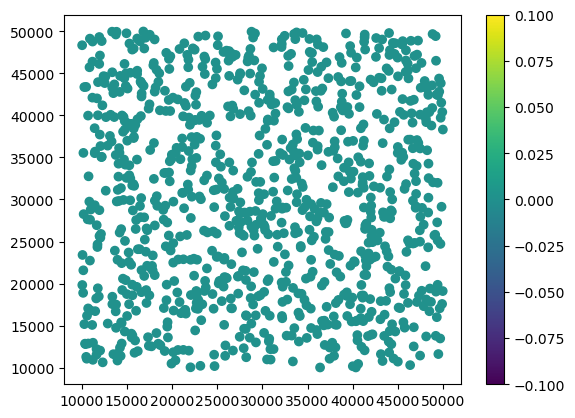

In [19]:
plt.scatter(x,y,c=data )
plt.colorbar()

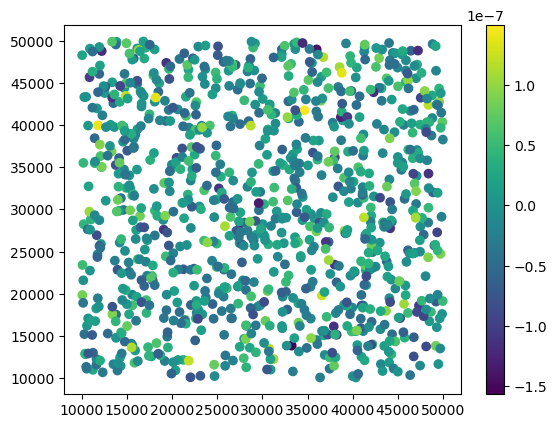

In [20]:
plt.scatter(x,y,c=dados_ruido )
plt.colorbar()

In [21]:
print(dados_ruido)

[ 1.36336049e-08 -1.17049745e-07 -4.48749200e-08 -1.11355474e-07
 -8.13550378e-08 -5.62566440e-08  2.40048516e-08  2.48951934e-08
 -1.71371491e-09 -4.43977752e-08  4.84094770e-08  1.91978255e-09
  8.86627716e-09  8.37347767e-08 -6.40143361e-08 -3.61954479e-08
 -6.02594717e-08  1.45177009e-08 -1.36823888e-08  5.85556459e-08
 -3.00359985e-09  6.24715548e-08 -2.23173754e-08 -4.61144942e-08
 -2.54902323e-08  6.09240566e-08 -5.90191686e-08 -7.90297418e-09
  9.27901640e-09 -5.34687865e-08 -2.60099627e-08 -3.20552303e-08
  3.44451897e-10  5.25961292e-08 -5.32576931e-08  3.75101399e-08
 -2.14711898e-08 -5.17828522e-08 -1.08387299e-07  3.03816635e-08
  2.53525049e-08 -1.27216402e-08 -9.10474607e-08  2.85643200e-08
  8.26625330e-09 -4.64368893e-08 -3.42119625e-08  6.24512776e-08
  5.86792514e-08 -1.98773454e-08  1.82407081e-08 -4.38654045e-08
  1.27916143e-08 -1.78203033e-08 -5.79795872e-08  1.45007217e-08
 -2.63953706e-08 -6.14241006e-08  4.41444162e-08  2.62029096e-09
  1.11795718e-07  5.99201

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fda38092c30>>
Traceback (most recent call last):
  File "/home/yago/miniforge3/envs/magali/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


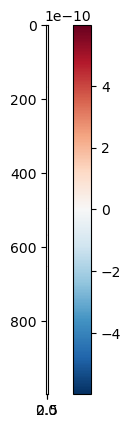

In [22]:
escala = np.max(np.abs(A))
plt.imshow(A, vmin=-escala, vmax=escala, cmap="RdBu_r")
plt.colorbar()
plt.show()